## Data Prep

In [24]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X, y = load_iris(return_X_y=True)
scaler = preprocessing.StandardScaler().fit(X)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X)
indices = range(X_scaled.shape[0])


x_train,x_test,y_train,y_test, indices_train, indices_test=train_test_split(X_scaled,y,indices, test_size=0.3,random_state=123)


In [46]:
indices_test[0:10]

[72, 112, 132, 88, 37, 138, 87, 42, 8, 90]

## Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]


In [31]:
clf.predict(x_train)

array([2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2])

In [28]:
clf.predict_proba(x_train)

array([[1.54765151e-04, 3.90262096e-02, 9.60819025e-01],
       [2.39264619e-04, 3.91638622e-02, 9.60596873e-01],
       [1.33223461e-02, 8.91717396e-01, 9.49602578e-02],
       [9.88050036e-01, 1.19498267e-02, 1.37671935e-07],
       [9.74485816e-01, 2.55138118e-02, 3.72040588e-07],
       [1.40257435e-03, 2.52258456e-01, 7.46338969e-01],
       [9.23271690e-01, 7.67237534e-02, 4.55662661e-06],
       [9.49202803e-01, 5.07966354e-02, 5.62018320e-07],
       [5.70707542e-03, 7.99590360e-01, 1.94702565e-01],
       [1.76383045e-02, 8.44532046e-01, 1.37829650e-01],
       [2.46254652e-02, 8.98507714e-01, 7.68668208e-02],
       [5.14142799e-02, 9.38087720e-01, 1.04980004e-02],
       [1.18968618e-03, 2.19787970e-01, 7.79022344e-01],
       [9.24439542e-03, 8.94770857e-01, 9.59847479e-02],
       [2.75897828e-04, 6.95768866e-02, 9.30147216e-01],
       [7.68668095e-01, 2.31321038e-01, 1.08661656e-05],
       [2.75967011e-04, 1.00353541e-01, 8.99370492e-01],
       [7.21445325e-02, 8.89887

## All types of SVM

In [32]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [33]:

def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [145]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = [
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
]

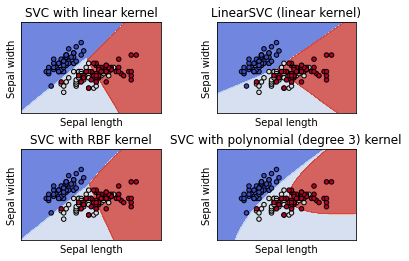

In [138]:

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Now let's do it on the scaled data train/test split

In [139]:
models_scaled = [clf.fit(x_train, y_train) for clf in models]

svm_pred = [clf.predict(x_test) for clf in models_scaled]

for pred_values, title in zip(svm_pred, titles):
    print("SVM classifier: " + title)
    print(accuracy_score(y_test, pred_values))
    print(classification_report(y_test, pred_values))
    print(confusion_matrix(y_test, pred_values))

SVM classifier: SVC with linear kernel
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]
SVM classifier: LinearSVC (linear kernel)
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 0 10  0]
 [ 0  2 15]]
SVM classifier: SVC with RBF kernel
0.9555555

### Can we do even better?

In [99]:
from sklearn import decomposition
from sklearn import ensemble,neighbors

indices = range(X_scaled.shape[0])
pca = decomposition.PCA(n_components=3)
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)


x_train,x_test,y_train,y_test, indices_train, indices_test=train_test_split(X_scaled_pca,y,indices, test_size=0.3,random_state=123)

In [100]:
indices_test[0:10]

[72, 112, 132, 88, 37, 138, 87, 42, 8, 90]

In [144]:
models_scaled = [clf.fit(x_train, y_train) for clf in models]

svm_pred = [clf.predict(x_test) for clf in models_scaled]

for pred_values, title in zip(svm_pred, titles):
    print("SVM classifier: " + title)
    print("------------------------")
    print(accuracy_score(y_test, pred_values))
    print(classification_report(y_test, pred_values))
    print(confusion_matrix(y_test, pred_values))

SVM classifier: SVC with linear kernel
------------------------
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

[[18  0  0]
 [ 0 10  0]
 [ 0  1 16]]
SVM classifier: LinearSVC (linear kernel)
------------------------
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 0 10  0]
 [ 0  2 